In [1]:
#libraries
import thesisFunctions
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ind3t10 = pd.read_csv('../dt/t310/ind3t10.csv') 
ind3t10.head()

,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,familyRelation,female,age,schoolLevel,finishedYear,...,male_25to34,female_14to24,female_25to34,female_35more,education,education2,age2,id,lnIncome,lnIncomeT
0,302468,1,1,32,1287,1,1,20,7.0,2,...,0,1,0,0,13.0,169.0,400,3024681,0.000000,7.600902
1,302468,1,2,32,1287,10,1,20,6.0,2,...,0,1,0,0,13.0,169.0,400,3024681,0.000000,7.600902
2,307861,1,1,32,1674,1,0,42,2.0,1,...,0,0,0,0,7.0,49.0,1764,3078611,8.006368,8.006368
3,307861,1,2,32,1674,2,1,44,7.0,1,...,0,0,0,1,17.0,289.0,1936,3078611,7.937375,7.937375
4,307861,1,3,32,1674,3,0,13,4.0,2,...,0,0,0,0,7.0,49.0,169,3078611,0.000000,0.000000


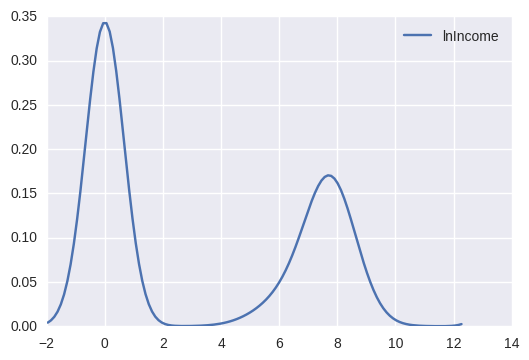

In [3]:
sns.kdeplot(ind3t10.lnIncome)

Hay muchos casos con ingresos 0 y sin trabajo. Estos quedan afuera

In [4]:
jobsAndIncome = ((ind3t10.activity==1) & (ind3t10.lnIncome>1))
ind3t10 = ind3t10.copy().loc[jobsAndIncome,:]

## outliers detections, se aproxima ala normal text??

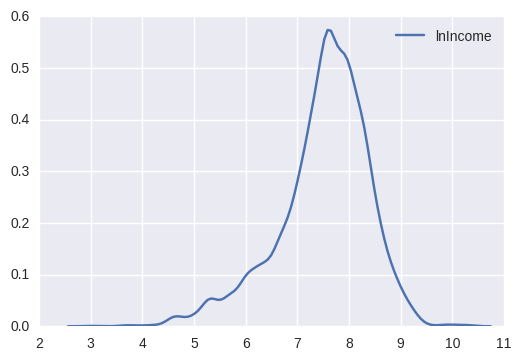

In [5]:
sns.kdeplot(ind3t10.lnIncome)

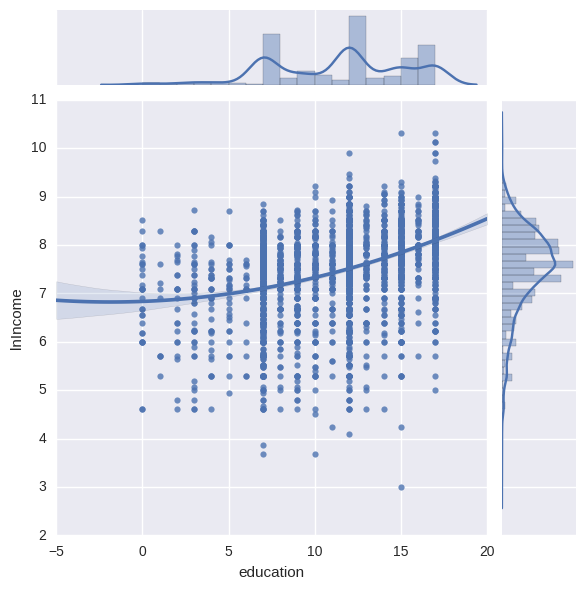

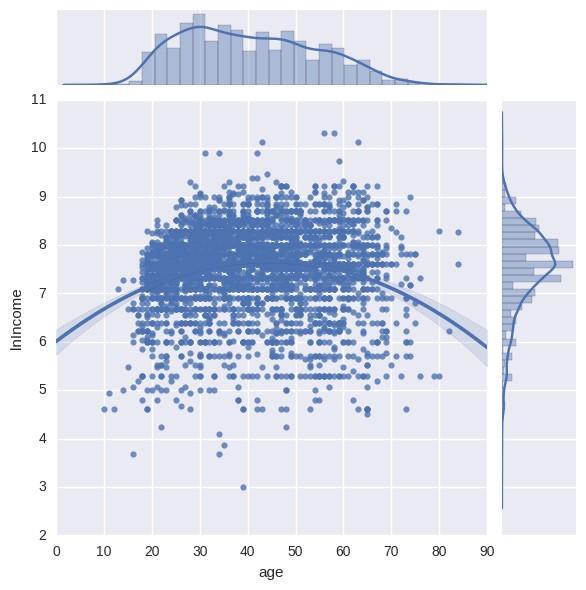

In [6]:
g = sns.JointGrid(x="education", y="lnIncome", data=ind3t10)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)

g2 = sns.JointGrid(x="age", y="lnIncome", data=ind3t10)  
g2.plot_joint(sns.regplot, order=2)  
g2.plot_marginals(sns.distplot)

# Model

In [7]:
model = thesisFunctions.runModel(ind3t10, income = 'lnIncome', variables= [
        'primary','secondary','university',
        'male_14to24','male_25to34',
        'female_14to24', 'female_25to34', 'female_35more'])

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            WLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     169.6
Date:                Wed, 12 Apr 2017   Prob (F-statistic):          1.71e-243
Time:                        14:25:49   Log-Likelihood:                -4124.3
No. Observations:                3608   AIC:                             8267.
Df Residuals:                    3599   BIC:                             8322.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8690      0.093     73.616      0.0

In [8]:
variables= [
        'primary','secondary','university',
        'male_14to24','male_25to34',
        'female_14to24', 'female_25to34', 'female_35more']
    
X = sm.add_constant(ind3t10.copy().loc[:,variables].values)
ind3t10['predicted'] = model.predict(X)

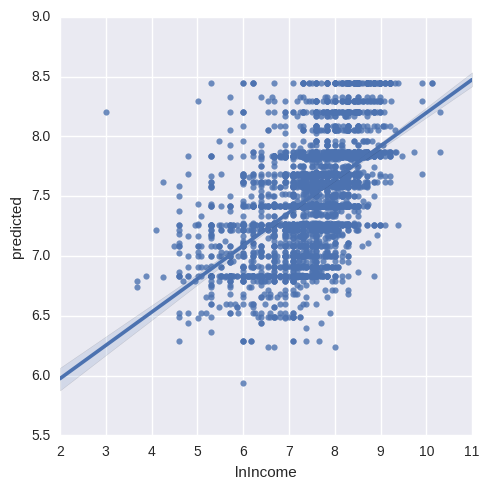

In [9]:
sns.lmplot(x = 'lnIncome', y ='predicted',data=ind3t10)


In [10]:
ind3t10['resid'] = ind3t10.lnIncome - ind3t10.predicted 
print ind3t10.resid.mean()

0.00105656007131


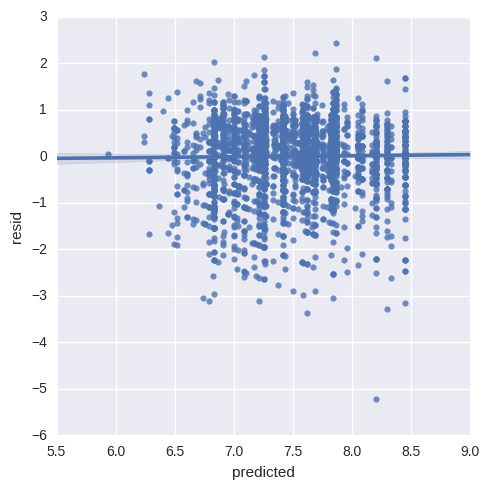

In [11]:
sns.lmplot(x = 'predicted', y ='resid',data=ind3t10)

# CAPECO

## Condicion de Percepcion CP - Genero y edad

In [15]:
#varones
varon35 = thesisFunctions.predictModelo(modelo=model, primary = 0, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

varon34 = thesisFunctions.predictModelo(modelo=model, primary = 0, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 1,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

varon24 = thesisFunctions.predictModelo(modelo=model, primary = 0, secondary = 0, university = 0,
                  male_14to24 = 1, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
#mujeres
mujer35 = thesisFunctions.predictModelo(modelo=model, primary = 0, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 1)
mujer34 = thesisFunctions.predictModelo(modelo=model, primary = 0, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 1, female_35tomore = 0)
mujer24 = thesisFunctions.predictModelo(modelo=model, primary = 0, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 1, female_25to34 = 0, female_35tomore = 0)

In [18]:
print varon34/varon35
print varon24/varon35
print mujer35/varon35
print mujer34/varon35
print mujer24/varon35

0.85666038188
0.656251133332
0.557505900714
0.534521600899
0.394727732721


## Valorización de los anios de Escolaridad - VAE

### Primaria


In [32]:
primariaCompleta = thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

primaria6 = thesisFunctions.predictModelo(modelo=model, primary = 6, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

primaria5 = thesisFunctions.predictModelo(modelo=model, primary = 5, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

primaria4 = thesisFunctions.predictModelo(modelo=model, primary = 4, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

primaria3 = thesisFunctions.predictModelo(modelo=model, primary = 3, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

primaria2 = thesisFunctions.predictModelo(modelo=model, primary = 2, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

primaria1 = thesisFunctions.predictModelo(modelo=model, primary = 1, secondary = 0, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)


In [38]:
print 'primaria6:', primaria6 * 7 / primariaCompleta
print 'primaria5:', primaria5 * 7 / primariaCompleta
print 'primaria4:', primaria4 * 7 / primariaCompleta
print 'primaria3:', primaria3 * 7 / primariaCompleta
print 'primaria2:', primaria2 * 7 / primariaCompleta
print 'primaria1:', primaria1 * 7 / primariaCompleta
print 'sin educacion:', varon35 * 7 / primariaCompleta

primaria6: 6.47025341774
primaria5: 5.9805970414
primaria4: 5.52799692104
primaria3: 5.10964871024
primaria2: 4.72296029012
primaria1: 4.36553570844
sin educacion: 4.03516033397


### Secundaria

In [45]:
secundaria1 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 1, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

secundaria2 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 2, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
secundaria3 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 3, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
secundaria4 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 4, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
secundaria5 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 5, university = 0,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

In [46]:
print 'secundaria1:', secundaria1 * 7 / primariaCompleta
print 'secundaria2:', secundaria2 * 7 / primariaCompleta
print 'secundaria3:', secundaria3 * 7 / primariaCompleta
print 'secundaria4:', secundaria4 * 7 / primariaCompleta
print 'secundaria5:', secundaria5 * 7 / primariaCompleta


secundaria1: 7.61216472993
secundaria2: 8.27786455365
secundaria3: 9.00178122777
secundaria4: 9.78900593836
secundaria5: 10.6450751064


### Universidad

In [59]:
univ1 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 5, university = 1,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
univ2 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 5, university = 2,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
univ3 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 5, university = 3,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
univ4 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 5, university = 4,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)
univ5 =  thesisFunctions.predictModelo(modelo=model, primary = 7, secondary = 5, university = 5,
                  male_14to24 = 0, male_25to34 = 0,
                  female_14to24 = 0, female_25to34 = 0, female_35tomore = 0)

In [61]:
print 'universidad1:', univ1 * 7 / primariaCompleta
print 'universidad2:', univ2 * 7 / primariaCompleta
print 'universidad3:', univ3 * 7 / primariaCompleta
print 'universidad4:', univ4 * 7 / primariaCompleta
print 'universidad5:', univ5 * 7 / primariaCompleta

universidad1: 12.0272157636
universidad2: 13.5888115
universidad3: 15.3531624951
universidad4: 17.346594189
universidad5: 19.5988500775


In [81]:
vaeDict = {0:varon35 * 7 / primariaCompleta,
          1:primaria1 * 7 / primariaCompleta,
          2:primaria2 * 7 / primariaCompleta,
          3:primaria3 * 7 / primariaCompleta,
          4:primaria4 * 7 / primariaCompleta,
          5:primaria5 * 7 / primariaCompleta,
          6:primaria6 * 7 / primariaCompleta,
          7:7,
          8:secundaria1 * 7 / primariaCompleta,
          9:secundaria2 * 7 / primariaCompleta,
          10:secundaria3 * 7 / primariaCompleta,
          11:secundaria4 * 7 / primariaCompleta,
          12:secundaria5 * 7 / primariaCompleta,
          13:univ1 * 7 / primariaCompleta,
          14:univ2 * 7 / primariaCompleta,
          15:univ3 * 7 / primariaCompleta,
          16:univ4 * 7 / primariaCompleta,
          17:univ5 * 7 / primariaCompleta}
vaeDict

{0: 4.0351603339694622,
 1: 4.3655357084352504,
 2: 4.7229602901244974,
 3: 5.1096487102354233,
 4: 5.5279969210417237,
 5: 5.9805970414038061,
 6: 6.4702534177439057,
 7: 7,
 8: 7.6121647299265085,
 9: 8.2778645536481612,
 10: 9.0017812277699107,
 11: 9.7890059383635144,
 12: 10.645075106435986,
 13: 12.027215763616956,
 14: 13.588811499990136,
 15: 15.353162495085449,
 16: 17.346594188952405,
 17: 19.59885007746885}

## Adulto Equivalente

## Reproducir nuevo capeco